# Atividades - Encontro 07/07

Para as atividades de hoje, você vai precisar gerar um dataset contendo dados educacionais de uma amostra aleatória de mil municípios a partir do Google BigQuery.

Utilize a Query abaixo e importe o CSV resultante no ambiente do Colab/Deepnote.

`SELECT * FROM basedosdados.br_inep_ideb.escola WHERE ano=2019 AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND() LIMIT 1000;`

Este dataset contém a média das notas de alunos do Sistema de Avaliação da Educação Básica (SAEB) por município, o ìndice de Desenvolvimento da Educação Básica (IDEB) do município, entre outras informações relacionadas. Para mais detalhes podem consultar o dicionário de dados no site da [Base dos Dados](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=escola).

Note que estamos trabalhando apenas com o ano de 2019.

### Atividade 1: Gerando Estatísticas Descritivas

In [72]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account

Importe o arquivo CSV em Pandas

In [73]:
# código
credencial=service_account.Credentials.from_service_account_file(
    '/content/drive/MyDrive/SIRIUS/Dados/Chaves/gabriel-sirius-e7b998baf018.json'
)

In [74]:
cliente=bigquery.Client(project=credencial.project_id,credentials=credencial)

In [75]:
df_ideb=cliente.query(
    '''
    SELECT * FROM basedosdados.br_inep_ideb.escola WHERE ano=2019 AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND() LIMIT 1000;
    ''').to_dataframe()

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df_ideb.shape

(1000, 14)

Gere uma tabela descritiva dos dados e compare medidas de tendência central, dispersão e quartis entre diferentes estados brasileiros para o valor do IDEB.

Dica: Crie diferentes dataframes com as medidas usando 'groupby' e em seguida integre todas as colunas em um novo DataFrame. No final, você pode ordenar por IDEB (do maior para o menor).

In [78]:
# código
df_trata=df_ideb.groupby('sigla_uf')['ideb'].agg([np.mean,np.std,np.median,np.var]).head()

In [79]:
df_trata

,mean,std,median,var
sigla_uf,,,,
AC,5.757143,1.045398,5.50,1.092857
AL,5.190476,0.920274,5.40,0.846905
AM,4.668421,1.145063,4.60,1.311170
AP,4.425000,0.877021,4.15,0.769167
BA,4.608081,0.989916,4.60,0.979934


In [80]:
df_25=df_ideb[['sigla_uf','ideb']].groupby('sigla_uf').quantile(0.25)

In [81]:
df_25

,ideb
sigla_uf,
AC,5.050
AL,4.400
AM,3.700
AP,4.000
BA,3.800
CE,5.700
DF,5.400
ES,5.425
GO,5.275


In [82]:
df_trata['1q']=df_25

In [83]:
df_trata

,mean,std,median,var,1q
sigla_uf,,,,,
AC,5.757143,1.045398,5.50,1.092857,5.05
AL,5.190476,0.920274,5.40,0.846905,4.40
AM,4.668421,1.145063,4.60,1.311170,3.70
AP,4.425000,0.877021,4.15,0.769167,4.00
BA,4.608081,0.989916,4.60,0.979934,3.80


In [84]:
df_50=df_ideb.groupby('sigla_uf')['ideb'].quantile(0.50)

In [85]:
df_trata['2q']=df_50

In [86]:
df_75=df_ideb.groupby('sigla_uf')['ideb'].quantile(0.75)

In [87]:
df_trata['3q']=df_75

In [88]:
df_trata.rename(columns={'mean':'media_ideb'},inplace=True)

In [89]:
df_trata=df_trata.sort_values('media_ideb',ascending=False)

Gere uma tabulação cruzada contendo a média das notas do IDEB, para diferentes estados e tipo de escola (municipal ou estadual).

Utilize apenas os seguintes estados na análise: MG, RS e SP (rode o código abaixo para filtrar a base de dados).

In [90]:
df_filtrado = df_ideb[(df_ideb['sigla_uf'] =='MG') | (df_ideb['sigla_uf'] == 'SP') | (df_ideb['sigla_uf'] == 'RS')]
df_filtrado

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,MG,3120805,31172430,municipal,fundamental,iniciais (1-5),97.0,0.970562,215.97,198.88,5.701618,5.5,5.6
3,2019,SP,3505500,35206404,municipal,fundamental,iniciais (1-5),94.4,0.948370,241.07,224.83,6.652443,6.3,5.8
5,2019,MG,3169901,31244244,municipal,fundamental,iniciais (1-5),90.5,0.895263,243.66,237.30,6.928789,6.2,6.3
7,2019,RS,4317954,43138926,estadual,fundamental,iniciais (1-5),100.0,1.000000,239.91,233.94,6.795942,6.8,5.6
12,2019,SP,3515004,35912578,estadual,fundamental,iniciais (1-5),99.2,0.993010,245.11,219.97,6.641361,6.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2019,RS,4305108,43043100,estadual,fundamental,iniciais (1-5),100.0,1.000000,247.41,246.75,7.172354,7.2,6.7
971,2019,SP,3522208,35075255,municipal,fundamental,iniciais (1-5),100.0,1.000000,233.24,229.99,6.596834,6.6,NaN
981,2019,MG,3130309,31033642,municipal,fundamental,iniciais (1-5),100.0,1.000000,218.13,209.60,5.937748,5.9,6.9
983,2019,MG,3162500,31136808,municipal,fundamental,iniciais (1-5),94.5,0.939623,232.17,210.16,6.216241,5.8,6.3


In [91]:
# código
pd.crosstab(df_filtrado.sigla_uf,df_filtrado.rede,values=df_filtrado.ideb,aggfunc=np.average,margins=True)

rede,estadual,municipal,All
sigla_uf,,,
MG,6.250000,5.905455,6.021687
RS,6.059259,5.742424,5.885000
SP,6.596552,6.483871,6.510656
All,6.308333,6.172928,6.215849


# Atividade 2: Outliers



Gere um boxplot para cada uma das variáveis a seguir e observe graficamente se há outliers: `taxa_aprovacao`, `indicador_rendimento`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa`, `nota_saeb_media_padronizada`, `ideb`.

Se houver outlier, calcule o intervalo interquartil e a partir deste obtenha quais são os municípios outliers.


Dicas:

1) Você pode utilizar tanto a biblioteca Seaborn quando a Plotly Express;

2) O intervalo interquartil é calculo por $Q3-Q1$

**Taxa Aprovação**

In [92]:
# Boxplot
import plotly.express as px
def boxplot(coluna):
  return px.box(df_ideb,y=coluna).show()
boxplot('taxa_aprovacao')


In [93]:
def interquartil(coluna):
  a=coluna.quantile(0.25)
  b=coluna.quantile(0.75)
  return round(b-a,2)

In [94]:
iq=interquartil(df_ideb.taxa_aprovacao)  
iq

7.9

In [95]:
df_ideb.taxa_aprovacao.describe()

count    1000.00000
mean       93.73710
std         6.84507
min        54.60000
25%        91.10000
50%        95.70000
75%        99.00000
max       100.00000
Name: taxa_aprovacao, dtype: float64

In [96]:
# Limites a partir do intervalo interquartílico
def limites(df_coluna):
  q1=df_coluna.quantile(0.25)
  q3=df_coluna.quantile(0.75)
  return [round(q1-1.5*(q3-q1),2),round(q3+1.5*(q3-q1),2)]
l_taxa_aprov=limites(df_ideb.taxa_aprovacao)
l_taxa_aprov


[79.25, 110.85]

In [97]:
# Recorte do Dataframe para compreender os outliers
df_ideb[(df_ideb['taxa_aprovacao']<l_taxa_aprov[0])|(df_ideb['taxa_aprovacao']>l_taxa_aprov[1])].taxa_aprovacao

4      68.5
8      72.4
10     78.8
22     77.8
84     75.4
120    68.3
151    78.6
179    65.8
192    72.5
217    74.1
276    72.9
284    77.2
313    69.4
360    75.4
362    65.0
366    61.7
387    79.1
389    71.9
430    78.3
441    68.5
462    66.7
469    78.4
520    66.7
528    73.0
560    75.0
580    76.4
583    77.4
589    66.7
612    63.8
614    54.6
681    77.4
707    74.4
777    78.8
797    74.7
799    78.2
834    74.5
843    74.6
852    67.7
853    77.9
862    78.8
888    75.0
889    62.9
961    77.9
996    77.9
Name: taxa_aprovacao, dtype: float64

**Indicador Rendimento**

In [98]:
# Boxplot
boxplot(df_ideb.indicador_rendimento)

In [99]:
# Limites a partir do intervalo interquartílico
l_ind_rend=limites(df_ideb.indicador_rendimento)


In [100]:
# Recorte do Dataframe para compreender os outliers
def recorte_df(df_colum,limite1,limite2):
  return df_ideb[(df_colum<limite1)|(df_colum>limite2)]


In [101]:
recorte_df(df_ideb['indicador_rendimento'],l_ind_rend[0],l_ind_rend[1])

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
4,2019,PA,1507201,15094847,municipal,fundamental,iniciais (1-5),68.5,0.678305,179.35,159.00,4.277672,2.9,4.3
8,2019,RJ,3305000,33096597,municipal,fundamental,iniciais (1-5),72.4,0.722020,214.08,211.03,5.886640,4.3,4.9
22,2019,BA,2906808,29946727,municipal,fundamental,iniciais (1-5),77.8,0.744542,186.77,167.78,4.579093,3.4,3.7
84,2019,PA,1501402,15034151,estadual,fundamental,iniciais (1-5),75.4,0.737065,205.21,191.49,5.361910,4.0,4.1
94,2019,BA,2905909,29019214,municipal,fundamental,iniciais (1-5),80.0,0.772470,172.25,142.08,3.834539,3.0,3.5
95,2019,RS,4300604,43013775,municipal,fundamental,iniciais (1-5),79.3,0.774286,206.33,191.83,5.389657,4.2,5.1
120,2019,PA,1501006,15099300,municipal,fundamental,iniciais (1-5),68.3,0.676166,173.58,165.61,4.288112,2.9,3.6
145,2019,MA,2100402,21234825,municipal,fundamental,iniciais (1-5),79.7,0.736043,178.63,152.91,4.153577,3.1,4.6
151,2019,RN,2404705,24080179,municipal,fundamental,iniciais (1-5),78.6,0.734735,163.49,130.61,3.458818,2.5,3.6
179,2019,BA,2932903,29406420,municipal,fundamental,iniciais (1-5),65.8,0.619501,189.33,177.36,4.802321,3.0,5.1


**SAEB Matemática**

In [102]:
df_ideb.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'id_escola', 'rede', 'ensino',
       'anos_escolares', 'taxa_aprovacao', 'indicador_rendimento',
       'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa',
       'nota_saeb_media_padronizada', 'ideb', 'projecao'],
      dtype='object')

In [103]:
# Boxplot
boxplot(df_ideb['nota_saeb_matematica'])

In [104]:
# Limites a partir do intervalo interquartílico
l_mat=limites(df_ideb['nota_saeb_matematica'])
l_mat

[143.2, 291.87]

In [105]:
# Recorte do Dataframe para compreender os outliers
recorte_df(df_ideb['nota_saeb_matematica'],l_mat[0],l_mat[1]).nota_saeb_matematica

Series([], Name: nota_saeb_matematica, dtype: float64)

**SAEB Língua Portuguesa**

In [106]:
# Boxplot
boxplot(df_ideb['nota_saeb_lingua_portuguesa'])

In [107]:
# Limites a partir do intervalo interquartílico
l_p=limites(df_ideb['nota_saeb_lingua_portuguesa'])

In [108]:
# Recorte do Dataframe para compreender os outliers
recorte_df(df_ideb['nota_saeb_lingua_portuguesa'],l_p[0],l_p[1])

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
151,2019,RN,2404705,24080179,municipal,fundamental,iniciais (1-5),78.6,0.734735,163.49,130.61,3.458818,2.5,3.6
614,2019,PA,1501808,15025535,municipal,fundamental,iniciais (1-5),54.6,0.558239,144.99,131.57,3.123219,1.7,NaN
877,2019,PA,1502004,15029018,municipal,fundamental,iniciais (1-5),86.8,0.840889,148.85,133.46,3.231247,2.7,3.3
990,2019,BA,2923704,29045967,municipal,fundamental,iniciais (1-5),91.9,0.913043,160.39,132.52,3.434576,3.1,3.5


**SAEB Média Padronizada**

In [109]:
# Boxplot
boxplot(df_ideb['nota_saeb_media_padronizada'])

In [110]:
# Limites a partir do intervalo interquartílico
l_med=limites(df_ideb['nota_saeb_media_padronizada'])

In [111]:
# Recorte do Dataframe para compreender os outliers
recorte_df(df_ideb['nota_saeb_media_padronizada'],l_med[0],l_med[1])

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
614,2019,PA,1501808,15025535,municipal,fundamental,iniciais (1-5),54.6,0.558239,144.99,131.57,3.123219,1.7,NaN


**IDEB**

In [112]:
# Boxplot
boxplot(df_ideb['ideb'])

In [113]:
# Limites a partir do intervalo interquartílico
l_ideb=limites(df_ideb['ideb'])

In [114]:
# Recorte do Dataframe para compreender os outliers
recorte_df(df_ideb['ideb'],l_ideb[0],l_ideb[1])

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
614,2019,PA,1501808,15025535,municipal,fundamental,iniciais (1-5),54.6,0.558239,144.99,131.57,3.123219,1.7,NaN


# Pergunta Aberta

A partir das análises realizadas acima, escreva um breve parágrafo de conclusão que possa direcionar políticas públicas na área de educação. Fundamente suas conclusões com resultados da análise.

Sua Resposta:


# Distribuições Estatísticas

### Atividade 3: Para cada uma das variáveis analisadas acima, faça o histograma e calcule a simetria e a curtose, e a partir disto decida se a variável tem distribuição aproximadamente normal.

Taxa Aprovação

In [115]:
# Histograma
def histograma(df_column):
  fig=px.histogram(df_ideb,x=df_ideb.sigla_uf,y=df_column)
  return fig.show()
histograma(df_ideb.taxa_aprovacao)

In [116]:
# Assimetria e Curtose
# (Q3 – Q2) – (Q2 – Q1) = 0 Simétrica
# (Q3 – Q2) – (Q2 – Q1) > 0 Assimetria à direita ou positiva
# (Q3 – Q2) – (Q2 – Q1) < 0 Assimetria à esquerda ou negativa
def assimetria(df_colum):
  Q1=df_colum.quantile(0.25)
  Q2=df_colum.quantile(0.50)
  Q3=df_colum.quantile(0.75)
  if (Q3 - Q2) - (Q2 - Q1) == 0:
    return "Simétrica"
  if (Q3 - Q2) - (Q2 - Q1) > 0:
    return "Assimetria à direita ou positiva"
  if (Q3 - Q2) - (Q2 - Q1) < 0:
    return "Assimetria à esquerda ou negativa"
assimetria(df_ideb.taxa_aprovacao)



'Assimetria à esquerda ou negativa'

In [117]:
def curtose(df_colum):
  Q1=df_colum.quantile(0.25)
  Q2=df_colum.quantile(0.50)
  Q3=df_colum.quantile(0.75)
  P90=df_colum.quantile(0.90)
  P10=df_colum.quantile(0.10)
  K = (Q3 - Q1)/2*(P90 - P10)
  if K == 0.263:
    return "mesocúrtica"
  if K > 0.263:
    return "platicúrtica"
  if K < 0.263:
    return "leptocúrtica"

In [118]:
curtose(df_ideb.taxa_aprovacao)

'platicúrtica'

Indicador Rendimento

In [119]:
# Histograma
histograma(df_ideb.indicador_rendimento)

In [120]:
assimetria(df_ideb.indicador_rendimento)

'Assimetria à esquerda ou negativa'

In [121]:
# Assimetria e Curtose
curtose(df_ideb.indicador_rendimento)

'leptocúrtica'

Nota SAEB Matemática

In [122]:
# Histograma
histograma(df_ideb.nota_saeb_matematica)

In [123]:
# Assimetria e Curtose
assimetria(df_ideb.nota_saeb_matematica)

'Assimetria à esquerda ou negativa'

In [124]:
curtose(df_ideb.nota_saeb_matematica)

'platicúrtica'

Nota SAEB Língua Portuguesa

In [125]:
# Histograma
histograma(df_ideb.nota_saeb_lingua_portuguesa)

In [126]:
# Assimetria e Curtose
assimetria(df_ideb.nota_saeb_lingua_portuguesa)

'Assimetria à esquerda ou negativa'

In [127]:
curtose(df_ideb.nota_saeb_lingua_portuguesa)

'platicúrtica'

Nota SAEB Média Padronizada

In [128]:
# Histograma
histograma(df_ideb.nota_saeb_media_padronizada)

In [129]:
# Assimetria e Curtose
assimetria(df_ideb.nota_saeb_media_padronizada)

'Assimetria à esquerda ou negativa'

In [130]:
curtose(df_ideb.nota_saeb_media_padronizada)

'platicúrtica'

IDEB

In [131]:
# Histograma
histograma(df_ideb.ideb)

In [132]:
# Assimetria e Curtose
assimetria(df_ideb.ideb)

'Simétrica'

In [133]:
curtose(df_ideb.ideb)

'platicúrtica'

# Pergunta Aberta

Quais variáveis podemos afirmar que possui distribuição próxima da normal?

Resposta:

# Comparando Distribuições Estatísticas

Na biblioteca plotly, podemos plotar histogramas sobrepostos. Essa á uma excelente ferramenta para a comparação de distribuições. Simplesmente use o parâmetro color='coluna' na função px.histogram().

Exercício: compare a distribuição do IDEB entre os três estados da base filtrada (que usou para comparar as médias).

In [134]:
# Código 
px.histogram(df_filtrado,x='sigla_uf',y='ideb',color='sigla_uf')

# Calculando um Intervalo de Confiança para uma Estimativa de Média

A partir da fórmula do Intervalo de Confiança abaixo, estime dois intervalos de confiança para a média do IDEB: um com uma amostra aleatória de 1000 municípios (dataset que você já importou) e outro para uma amostra de no máximo 50 municípios. É sugerido usar o nível de 95% de confiança.

*Utilize a query abaixo no Google BigQuery alterando o valor após 'LIMIT' para definir a quantidade de municípios que quiser (menos de 50). Sugere-se baixar o arquivo .csv do BigQuery e utilizar no Google Colab/Deepnote.

Após calcular o intervalo de confiança, vá até o Google Big Query e calcule a verdadeira média do IDEB e verifique se ficou dentro do intervalo de confiança.

*Fique à vontade também para alterar o nível de confiança (valor Z) e ver o que acontece com o intervalo de confiança!

`SELECT * FROM basedosdados.br_inep_ideb.escola WHERE (ano=2019) AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND() LIMIT 800;`

Utilize a Query abaixo para calcular a média populacional no Google BigQuery

`SELECT avg(***nomecoluna***) FROM basedosdados.br_inep_ideb.escola WHERE (ano=2019) AND nota_saeb_matematica IS NOT NULL AND anos_escolares = 'iniciais (1-5)' ORDER BY RAND();`

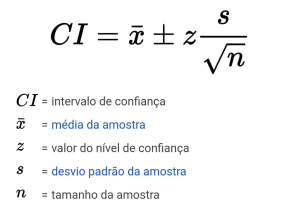

Parte 1: Amostra Grande (1000 municípios)



In [135]:
# Calcular o valor de Z
from math import sqrt
import scipy.stats as st

In [136]:
sig=0.05
z=st.norm.ppf(1-sig/2)

In [137]:
# Calcular demais estatísticas da fórmula do IC e gerar o IC!
def ci(df_column):
  return [df_column.mean()-z*(df_column.std()/sqrt(len(df_column))),df_column.mean()+z*(df_column.std()/sqrt(len(df_column)))]
ci(df_ideb.taxa_aprovacao)


[93.31284593794673, 94.16135406205329]

In [138]:
ci(df_ideb.ideb)

[5.4205282792056515, 5.5588717207943485]

In [139]:
ci(df_ideb.indicador_rendimento)

[0.9314934394216454, 0.9402290550583545]

In [140]:
ci(df_ideb.nota_saeb_lingua_portuguesa)

[202.7525727964693, 205.8771272035307]

In [141]:
ci(df_ideb.nota_saeb_matematica)

[216.04727340740746, 219.28080659259254]

In [142]:
ci(df_ideb.nota_saeb_media_padronizada)

[5.774555724175273, 5.8913192414247275]

Parte 2: Amostra Pequena (menos de 50 municípios)

In [143]:
# Importar novo DataFrame (amostra pequena)
#Para pegar 50 municipios, devemos levar em consideração que eles se repetem, por isso usei o metodo unique para me trazer os únicos valores e armazenar em um lista
mun=df_ideb.id_municipio.unique().tolist()
#Faço um slice das 50 posições
mun=mun[:50]
#pego o ultimo municipio
mun[len(mun)-1]

'2307304'

In [144]:
#Faço um filtro para saber a ultima ocorrencia da ultima posição pois encontro o valor dessa posição e a partir disso, as posições anteriores são dos 50 municipios
df_ideb[df_ideb['id_municipio']==mun[len(mun)-1]]


,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
52,2019,CE,2307304,23262702,municipal,fundamental,iniciais (1-5),99.5,0.994755,209.02,207.0,5.71662,5.7,4.9


In [145]:
df_50=df_ideb[:234]
df_50

,ano,sigla_uf,id_municipio,id_escola,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2019,MG,3120805,31172430,municipal,fundamental,iniciais (1-5),97.0,0.970562,215.97,198.88,5.701618,5.5,5.6
1,2019,PE,2613701,26171562,municipal,fundamental,iniciais (1-5),90.9,0.935397,188.46,185.38,4.931345,4.6,4.3
2,2019,RJ,3302502,33052972,municipal,fundamental,iniciais (1-5),93.9,0.937895,204.86,201.55,5.538513,5.2,4.8
3,2019,SP,3505500,35206404,municipal,fundamental,iniciais (1-5),94.4,0.948370,241.07,224.83,6.652443,6.3,5.8
4,2019,PA,1507201,15094847,municipal,fundamental,iniciais (1-5),68.5,0.678305,179.35,159.00,4.277672,2.9,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2019,PR,4101804,41123751,municipal,fundamental,iniciais (1-5),95.1,0.942091,222.63,207.86,5.992171,5.6,5.8
230,2019,PE,2611606,26126389,municipal,fundamental,iniciais (1-5),90.4,0.899553,201.61,200.08,5.449581,4.9,4.8
231,2019,PB,2516201,25019090,municipal,fundamental,iniciais (1-5),94.4,0.946232,230.00,215.75,6.276284,5.9,4.5
232,2019,PB,2509008,25035444,estadual,fundamental,iniciais (1-5),88.7,0.881277,218.19,200.03,5.765075,5.1,4.2


In [148]:
# Calcular o valor de Z
z

1.959963984540054

In [147]:
# Calcular demais estatísticas da fórmula do IC e gerar o IC!



In [149]:
ci(df_50.ideb)

[5.319960689407347, 5.60738973794308]

In [150]:
ci(df_50.indicador_rendimento)

[0.9227617324024754, 0.9418010033240202]

In [151]:
ci(df_50.nota_saeb_lingua_portuguesa)

[201.00527681176422, 207.32694541045802]

In [152]:
ci(df_50.nota_saeb_matematica)

[214.2078723600109, 220.6654609733225]

In [153]:
ci(df_50.nota_saeb_media_padronizada)

[5.708514272189457, 5.943270471400287]